In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline


In [27]:
stock_1_ticker='AXISBANK.NS'
stock_2_ticker='SBIN.NS'
data_1=yf.download(stock_1_ticker,'2022-06-01','2023-06-30')
data_2=yf.download(stock_2_ticker,'2022-06-01','2023-06-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
data_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,683.000000,692.450012,680.500000,686.049988,683.600891,6966674
2022-06-02,682.000000,693.150024,682.000000,691.549988,689.081238,6347433
2022-06-03,697.299988,698.000000,673.150024,677.299988,674.882141,8475726
2022-06-06,677.000000,684.000000,670.299988,672.200012,669.800415,6756864
2022-06-07,672.200012,678.000000,661.099976,665.849976,663.473022,8312778
...,...,...,...,...,...,...
2023-06-22,962.200012,973.450012,958.700012,966.599976,964.615540,10135883
2023-06-23,960.000000,965.500000,954.549988,958.400024,956.432434,6188008
2023-06-26,959.500000,963.500000,953.099976,960.549988,958.577942,5799528


In [29]:
data_2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,468.000000,472.000000,464.700012,468.299988,459.373199,9424008
2022-06-02,466.899994,472.350006,466.149994,469.850006,460.893677,9370989
2022-06-03,473.250000,475.500000,463.500000,464.500000,455.645660,11306291
2022-06-06,464.200012,465.600006,456.500000,463.700012,454.860901,10661432
2022-06-07,461.850006,465.950012,460.500000,463.399994,454.566620,7672515
...,...,...,...,...,...,...
2023-06-22,566.349976,569.000000,561.049988,562.950012,562.950012,14979063
2023-06-23,562.000000,562.099976,553.799988,554.599976,554.599976,12215712
2023-06-26,556.000000,558.500000,554.500000,557.049988,557.049988,8360264


In [30]:
data_1_close = data_1['Close']
data_2_close = data_2['Close']

In [31]:
data_1_close

Date
2022-06-01    686.049988
2022-06-02    691.549988
2022-06-03    677.299988
2022-06-06    672.200012
2022-06-07    665.849976
                 ...    
2023-06-22    966.599976
2023-06-23    958.400024
2023-06-26    960.549988
2023-06-27    973.250000
2023-06-28    973.250000
Name: Close, Length: 268, dtype: float64

In [32]:
data_2_close

Date
2022-06-01    468.299988
2022-06-02    469.850006
2022-06-03    464.500000
2022-06-06    463.700012
2022-06-07    463.399994
                 ...    
2023-06-22    562.950012
2023-06-23    554.599976
2023-06-26    557.049988
2023-06-27    566.099976
2023-06-28    566.099976
Name: Close, Length: 268, dtype: float64

In [33]:
correl = data_1_close.corr(data_2_close)
correl

0.8547313110080552

In [35]:
df = pd.DataFrame({'AXIS_BANK': data_1_close, 'SBI_BANK': data_2_close}, index=data_1.index)
df['price_ratio']=(df.AXIS_BANK)/df.SBI_BANK
df

,AXIS_BANK,SBI_BANK,price_ratio
Date,,,
2022-06-01,686.049988,468.299988,1.464980
2022-06-02,691.549988,469.850006,1.471853
2022-06-03,677.299988,464.500000,1.458127
2022-06-06,672.200012,463.700012,1.449644
2022-06-07,665.849976,463.399994,1.436880
...,...,...,...
2023-06-22,966.599976,562.950012,1.717026
2023-06-23,958.400024,554.599976,1.728092
2023-06-26,960.549988,557.049988,1.724352


Text(0, 0.5, 'price ratio')

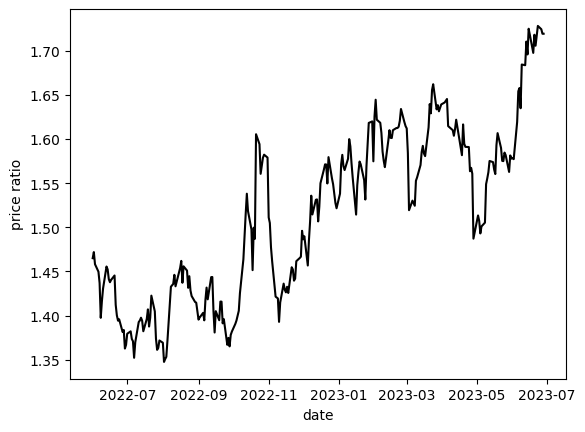

In [36]:
plt.plot(df.index,df.price_ratio,color='black')
plt.xlabel('date')
plt.ylabel('price ratio')

In [37]:
def calculate_rsi(data, window=14):
    price_change = data.diff(1)

    up_prices = price_change.where(price_change > 0, 0)
    down_prices = price_change.where(price_change < 0, 0)

    avg_gain = up_prices.rolling(window).mean()
    avg_loss = down_prices.abs().rolling(window).mean()

    rsi = 100 - (100 / (1 + (avg_gain/avg_loss)))
    return rsi

In [39]:
df['rsi_AXIS_BANK']=calculate_rsi(df.AXIS_BANK)
df['rsi_SBI_BANK']=calculate_rsi(df.SBI_BANK)
df

,AXIS_BANK,SBI_BANK,price_ratio,rsi_AXIS_BANK,rsi_SBI_BANK
Date,,,,,
2022-06-01,686.049988,468.299988,1.464980,NaN,NaN
2022-06-02,691.549988,469.850006,1.471853,NaN,NaN
2022-06-03,677.299988,464.500000,1.458127,NaN,NaN
2022-06-06,672.200012,463.700012,1.449644,NaN,NaN
2022-06-07,665.849976,463.399994,1.436880,NaN,NaN
...,...,...,...,...,...
2023-06-22,966.599976,562.950012,1.717026,64.695231,20.958084
2023-06-23,958.400024,554.599976,1.728092,53.113428,17.465057
2023-06-26,960.549988,557.049988,1.724352,46.393188,22.090749


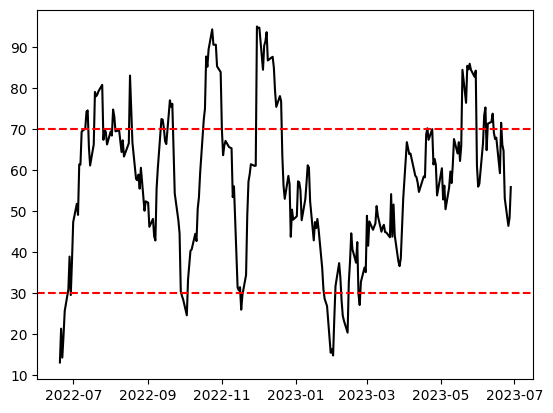

In [45]:
plt.plot(df.index,df.rsi_AXIS_BANK,color='black')
plt.axhline(30,linestyle='--',color='red')
plt.axhline(70,linestyle='--',color='red')

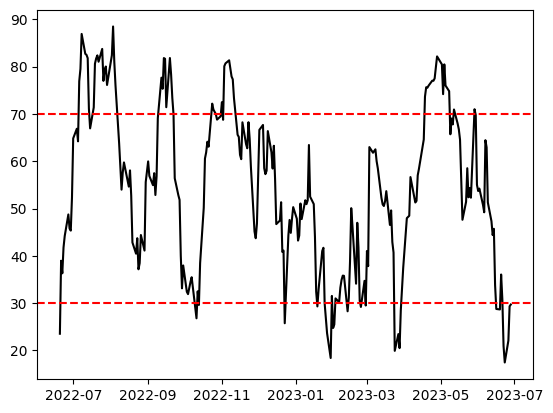

In [46]:
plt.plot(df.index,df.rsi_SBI_BANK,color='black')
plt.axhline(30,linestyle='--',color='red')
plt.axhline(70,linestyle='--',color='red')

In [47]:
df['rsi_ratio']=df.rsi_AXIS_BANK/df.rsi_SBI_BANK
df

,AXIS_BANK,SBI_BANK,price_ratio,rsi_AXIS_BANK,rsi_SBI_BANK,rsi_ratio
Date,,,,,,
2022-06-01,686.049988,468.299988,1.464980,NaN,NaN,NaN
2022-06-02,691.549988,469.850006,1.471853,NaN,NaN,NaN
2022-06-03,677.299988,464.500000,1.458127,NaN,NaN,NaN
2022-06-06,672.200012,463.700012,1.449644,NaN,NaN,NaN
2022-06-07,665.849976,463.399994,1.436880,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-06-22,966.599976,562.950012,1.717026,64.695231,20.958084,3.086887
2023-06-23,958.400024,554.599976,1.728092,53.113428,17.465057,3.041125
2023-06-26,960.549988,557.049988,1.724352,46.393188,22.090749,2.100118


In [48]:
high_threshold = 1.2
low_threshold = 0.8
rsi_ratio=df.rsi_ratio

temp=0

signals = []
for i in range(len(rsi_ratio)):
    if rsi_ratio[i] > high_threshold and temp!=-1:
        signals.append(-1)  # sell stock_1, buy stock_2
        temp=-1
    elif rsi_ratio[i] < low_threshold and temp!=1:
        signals.append(1)   # buy stock_1, sell stock_2
        temp=1
    else:
        signals.append(0)   # No trade

print(signals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [50]:
capital=100000
number_of_stocks_1=0
number_of_stocks_2=0
in_hand=capital
returns=[]

for i in range(len(signals)):
    if signals[i]==1:
        in_hand+=number_of_stocks_2*data_2_close[i]
        number_of_stocks_2=0
        temp=in_hand//data_1_close[i]
        in_hand-=temp*data_1_close[i]
        number_of_stocks_1+=temp

    if signals[i]==-1:
        in_hand+=number_of_stocks_1*data_1_close[i]
        number_of_stocks_1=0
        temp=in_hand//data_2_close[i]
        in_hand-=temp*data_2_close[i]
        number_of_stocks_2+=temp

    returns.append(in_hand+data_1_close[i]*number_of_stocks_1+data_2_close[i]*number_of_stocks_2)

In [52]:
final_returns=returns[-1]
print("Return on investing Rs. 100000 is:",final_returns)

percentage_returns=format((((final_returns)-(capital))/capital)*(100),".2f")
print("Percentage return in case of combined strategy is:",percentage_returns,"%")

Return on investing Rs. 100000 is: 162998.11541748047
Percentage return in case of combined strategy is: 63.00 %


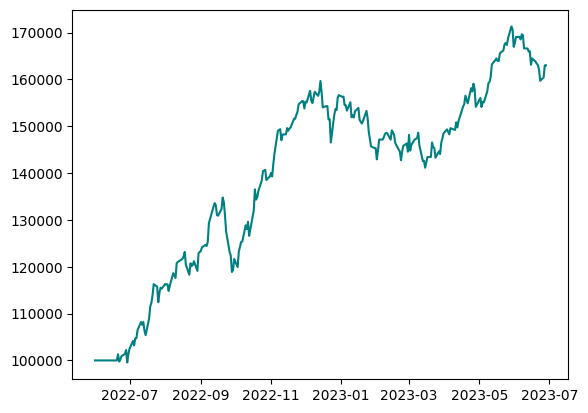

In [53]:
plt.plot(df.index,returns,color='teal')

In [54]:
adjusted_returns = [x - 0.05 for x in returns]
sharpe_ratio = np.mean(adjusted_returns)/np.std(returns)
sharpe_ratio

6.901382210896894